# Titanic: Machine Learning from Disaster

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

### Download data

In [3]:
df_train = pd.read_csv('C:\\Users\\ELENA\\Downloads\\titanic\\train.csv', index_col="PassengerId")
df_test = pd.read_csv('C:\\Users\\ELENA\\Downloads\\titanic\\test.csv')

#### Variable Notes

In [4]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
df_train.drop(["Cabin", "Name", "Ticket"], axis=1, inplace=True)

### Processing passes

#### Train dataset

In [7]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

#### Age

In [8]:
df_train['Age'].median()

28.0

In [9]:
df_train.loc[df_train['Age'].isnull(), 'Age'] = df_train['Age'].median()

#### Embarked

In [10]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
df_train['Embarked'].fillna("S")

PassengerId
1      S
2      C
3      S
4      S
5      S
      ..
887    S
888    S
889    S
890    C
891    Q
Name: Embarked, Length: 891, dtype: object

#### Test dataset

In [12]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Age

In [13]:
df_test.loc[df_test['Age'].isnull(), 'Age'] = df_test['Age'].median()

In [14]:
df_test.drop(["Cabin", "Name", "Ticket"], axis=1, inplace=True)

### Consider categorical features

#### Train dataset

#### Sex

In [15]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [16]:
sex_map = {
    'female': 1,
    'male': 0
}

In [17]:
df_train['Sex'] = df_train['Sex'].map(sex_map)

#### Embarked

In [18]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,S
2,1,1,1,38.0,1,0,71.2833,C
3,1,3,1,26.0,0,0,7.9250,S
4,1,1,1,35.0,1,0,53.1000,S
5,0,3,0,35.0,0,0,8.0500,S


In [19]:
df_train = pd.get_dummies(df_train)

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0,0,1
2,1,1,1,38.0,1,0,71.2833,1,0,0
3,1,3,1,26.0,0,0,7.9250,0,0,1
4,1,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,0,35.0,0,0,8.0500,0,0,1


In [20]:
df_train['Pclass'] = df_train['Pclass'].astype('category')

df_train = pd.get_dummies(df_train)

df_train.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,
1,0,0,22.0,1,0,7.2500,0,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,0,1,0,0
3,1,1,26.0,0,0,7.9250,0,0,1,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1,1,0,0
5,0,0,35.0,0,0,8.0500,0,0,1,0,0,1


#### Test dataset

#### Sex

In [21]:
df_test['Sex'] = df_test['Sex'].map(sex_map)

#### Embarked

In [22]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,Q
1,893,3,1,47.0,1,0,7.0000,S
2,894,2,0,62.0,0,0,9.6875,Q
3,895,3,0,27.0,0,0,8.6625,S
4,896,3,1,22.0,1,1,12.2875,S


In [23]:
df_test = pd.get_dummies(df_test)

df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,34.5,0,0,7.8292,0,1,0
1,893,3,1,47.0,1,0,7.0000,0,0,1
2,894,2,0,62.0,0,0,9.6875,0,1,0
3,895,3,0,27.0,0,0,8.6625,0,0,1
4,896,3,1,22.0,1,1,12.2875,0,0,1


In [24]:
df_test['Pclass'] = df_test['Pclass'].astype('category')

df_test = pd.get_dummies(df_test)

df_test.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,892,0,34.5,0,0,7.8292,0,1,0,0,0,1
1,893,1,47.0,1,0,7.0000,0,0,1,0,0,1
2,894,0,62.0,0,0,9.6875,0,1,0,0,1,0
3,895,0,27.0,0,0,8.6625,0,0,1,0,0,1
4,896,1,22.0,1,1,12.2875,0,0,1,0,0,1


### Describtion of data

In [25]:
df_train.describe()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.352413,29.361582,0.523008,0.381594,32.204208,0.188552,0.086420,0.722783,0.242424,0.206510,0.551066
std,0.486592,0.477990,13.019697,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876,0.428790,0.405028,0.497665
min,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
features = ['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 
                   'Pclass_1', 'Pclass_2', 'Pclass_3']

target = 'Survived'

#### Matrix of correlation

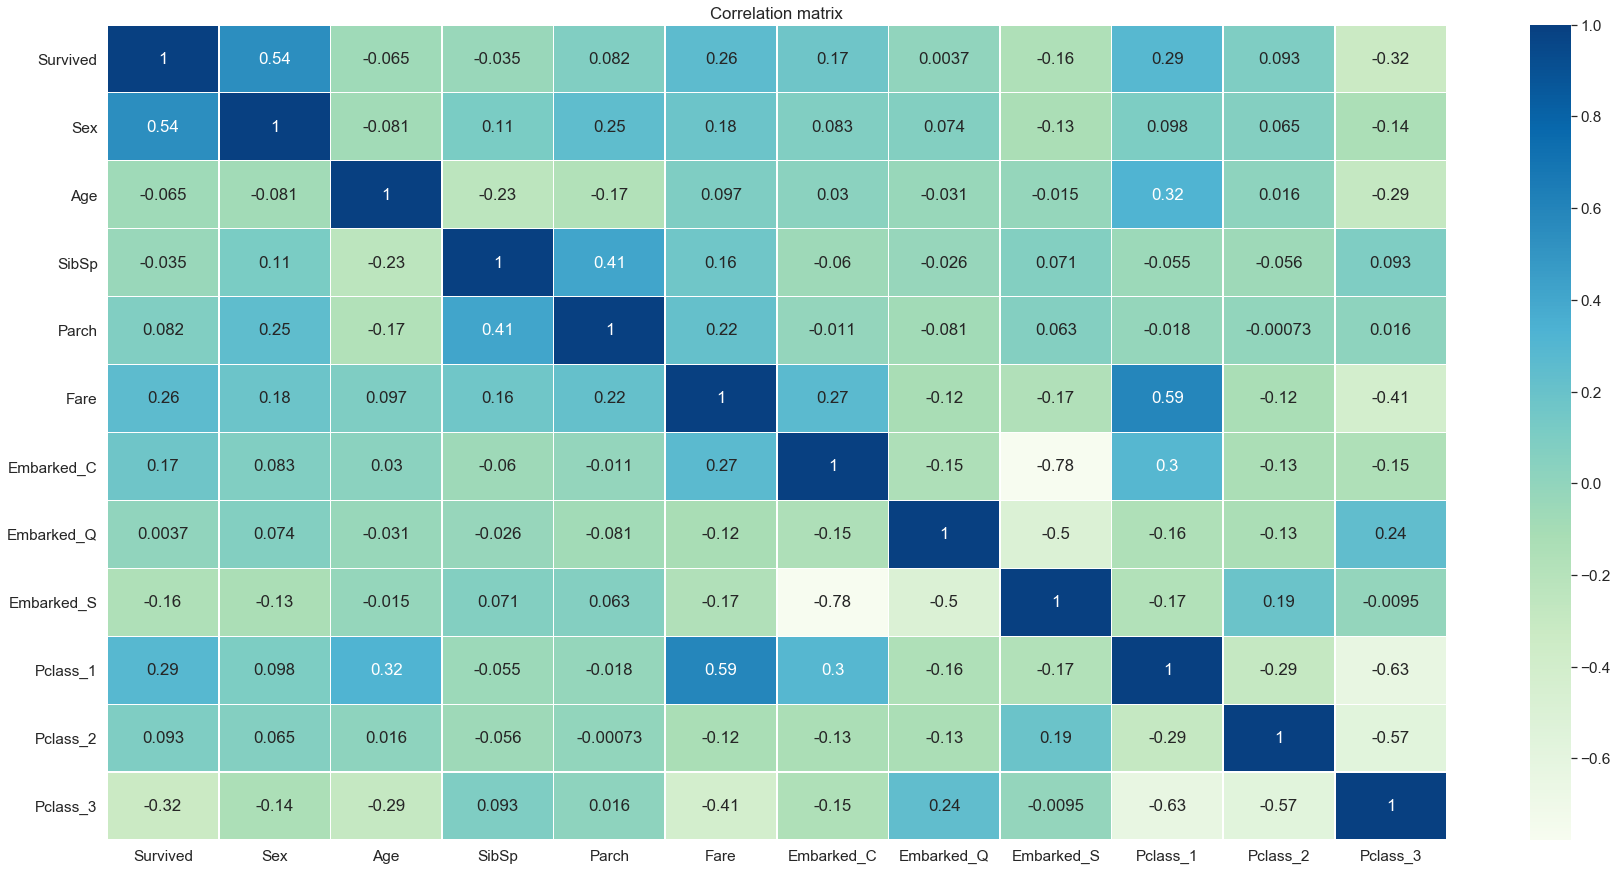

In [27]:
plt.figure(figsize = (30,15))

sns.set(font_scale=1.4)
sns.heatmap(df_train.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

#### Analyze

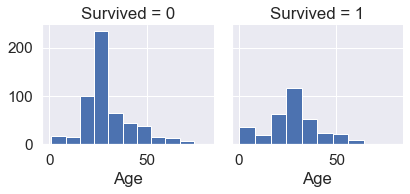

In [28]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=10)

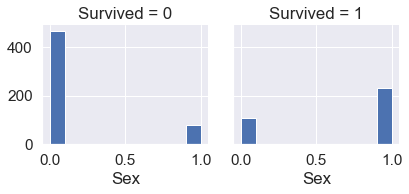

In [29]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Sex', bins=10)

### Create new feature

In [30]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

df_train.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,FamilySize
PassengerId,,,,,,,,,,,,,
1,0,0,22.0,1,0,7.2500,0,0,1,0,0,1,2
2,1,1,38.0,1,0,71.2833,1,0,0,1,0,0,2
3,1,1,26.0,0,0,7.9250,0,0,1,0,0,1,1
4,1,1,35.0,1,0,53.1000,0,0,1,1,0,0,2
5,0,0,35.0,0,0,8.0500,0,0,1,0,0,1,1


In [31]:
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

df_test.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,FamilySize
0,892,0,34.5,0,0,7.8292,0,1,0,0,0,1,1
1,893,1,47.0,1,0,7.0000,0,0,1,0,0,1,2
2,894,0,62.0,0,0,9.6875,0,1,0,0,1,0,1
3,895,0,27.0,0,0,8.6625,0,0,1,0,0,1,1
4,896,1,22.0,1,1,12.2875,0,0,1,0,0,1,3


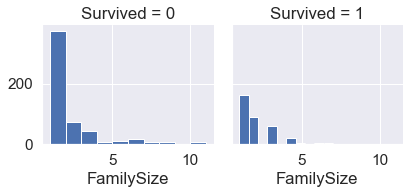

In [32]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'FamilySize', bins=10)

### Splitting the sample into training, validation and test

In [33]:
y = df_train[target]
X = df_train.drop(target, axis=1)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

In [50]:
X_test  = df_test.drop("PassengerId", axis=1).copy()

### Model KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
k_values = np.arange(1, 11)

accuracy_on_valid = []
accuracy_on_train = []

for i, value in enumerate(k_values):
    clf = KNeighborsClassifier(n_neighbors=value)
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_valid)
    y_pred_train = clf.predict(X_train)
        
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    if i % 2 == 0:
        print('K = {}'.format(value))
        print('\tacc_valid = {}'.format(acc_valid))
        print('\tacc_train = {}\n'.format(acc_train))
    
    accuracy_on_valid.append(acc_valid)
    accuracy_on_train.append(acc_train)

K = 1
	acc_valid = 0.6753731343283582
	acc_train = 0.9871589085072231

K = 3
	acc_valid = 0.6791044776119403
	acc_train = 0.8298555377207063

K = 5
	acc_valid = 0.7089552238805971
	acc_train = 0.8089887640449438

K = 7
	acc_valid = 0.7164179104477612
	acc_train = 0.7849117174959872

K = 9
	acc_valid = 0.6940298507462687
	acc_train = 0.7736757624398074



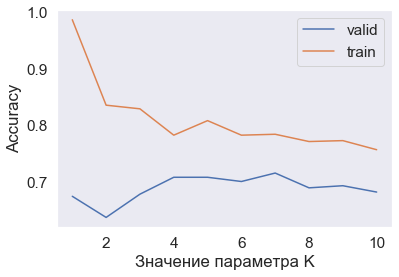

In [40]:
plt.plot(k_values, accuracy_on_valid, label="valid")
plt.plot(k_values, accuracy_on_train, label="train")

plt.xlabel('Значение параметра K')
plt.ylabel('Accuracy')

plt.legend()
plt.grid()

plt.show()

In [41]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_valid)

accuracy_score(y_valid, y_pred)

0.7164179104477612

In [51]:
y_test_preds = knn.predict(X_test)

In [53]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": y_test_preds
    })

In [55]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [56]:
submission.to_csv('C:\\Users\\ELENA\\Downloads\\submission.csv', index=None)